# Snowflake - One Data Platform for the Enterprise


## <ins>Snowflake for DataLake and Lakehouse</ins>

By defenition, a Data Lake is a storage repository that should store **infinite** amount of structured, semi-structured, and unstructured data. 

Snowflake with its unique architecture of leveraging any cloud (AWS, GCS, Azure) blob storage as its STORAGE layer is a perfect fit for the definition. Adding more to it, Snowflake also encrypts all your data with **<ins>AES-256 encryption</ins>** at REST and also applies **<ins>patented compression</ins>** on the data ensuring you are paying lower cost of storage compared to the hyper-scalers. 

With its unmatched performance and near infinite scalability you can retrieve business value out of your data lake instantly making **SNOWFLAKE A PERFECT LAKEHOUSE**

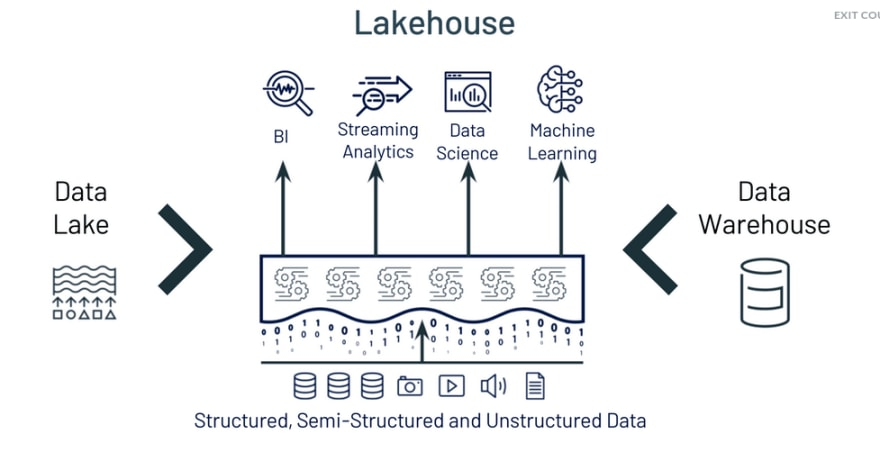

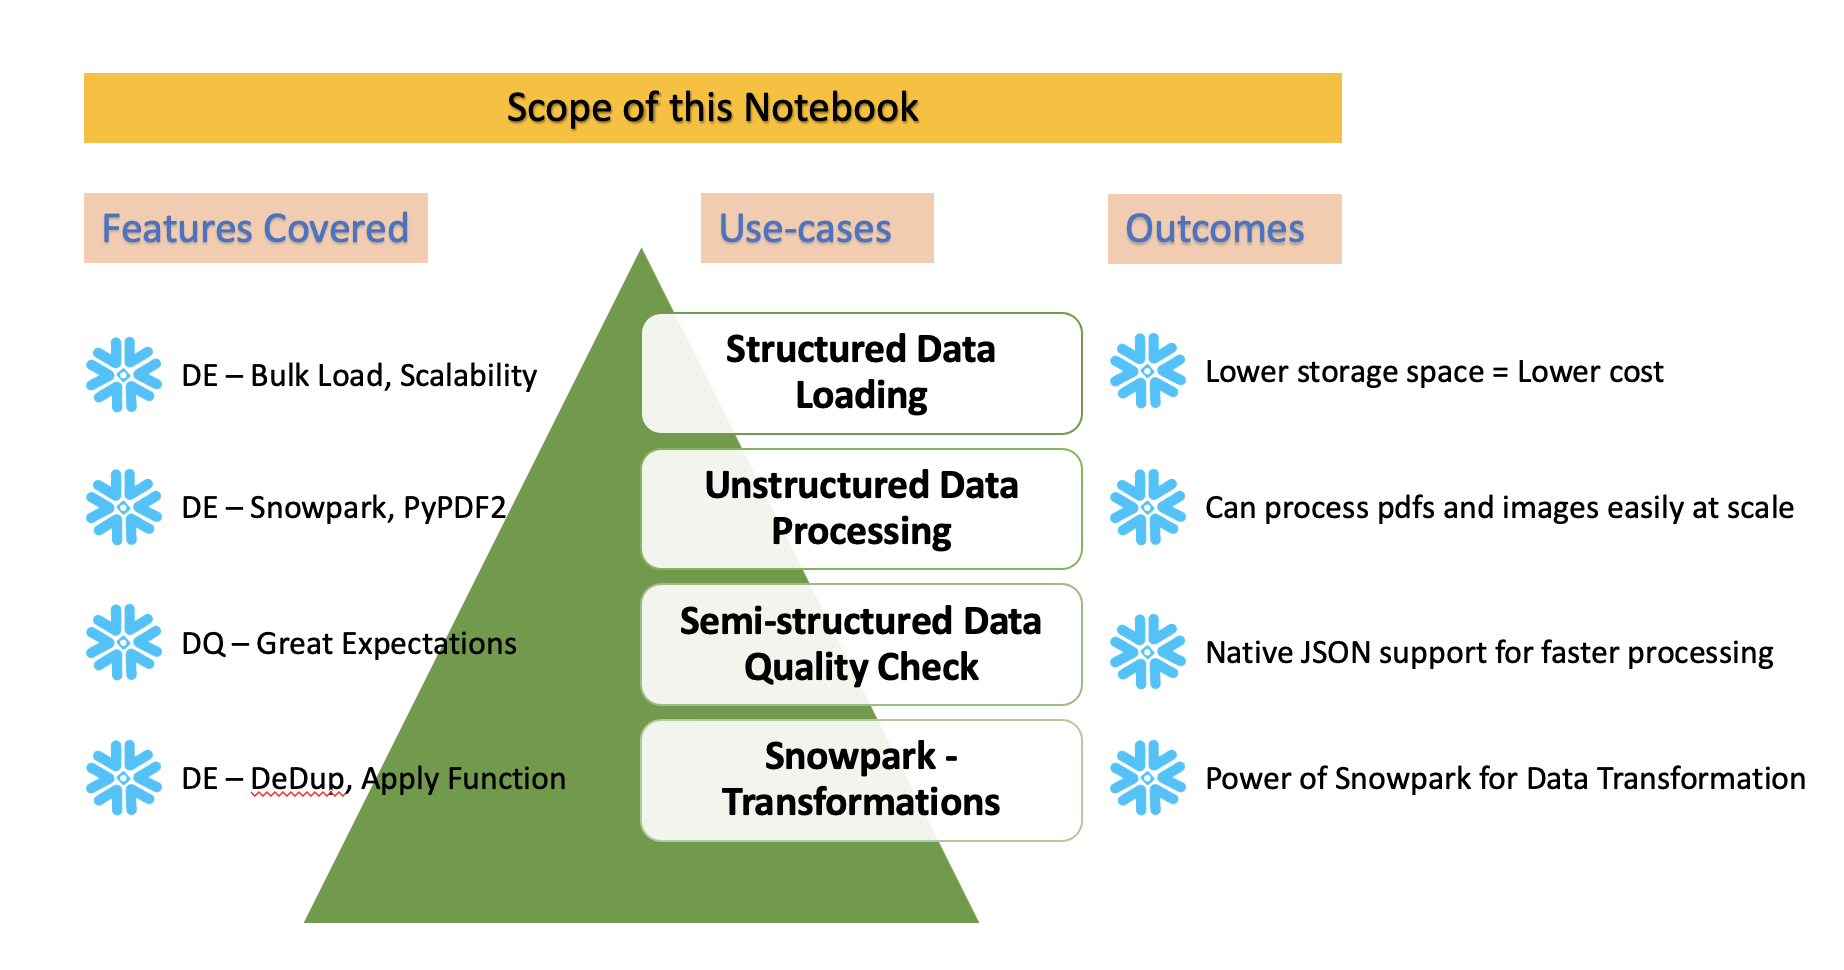

# <font size="5"><ins>Structured Data Loading</ins></font>

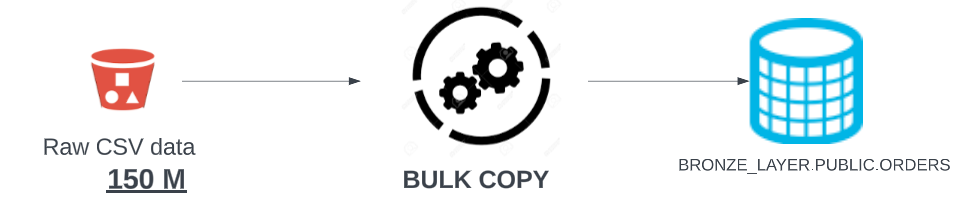

In this exercise, we will load raw csv files from S3 in bulk into Snowflake. Compare the size of data in the cloud Vs Snowflake - Saving storage cost

In [2]:
# Snowpark
import snowflake.snowpark
from snowflake.snowpark.functions import sproc
from snowflake.snowpark.session import Session
from snowflake.snowpark import version as v
import json
from config import snowflake_conn_prop_local as snowflake_udf_conn_prop

import pandas as pd
import numpy as np
import datetime
import io

session = Session.builder.configs(snowflake_udf_conn_prop).create()
print(session.sql('select current_account(), current_warehouse(), current_database(), current_schema()').collect())

session.add_packages('snowflake-snowpark-python', 'pandas', 'numpy')

[Row(CURRENT_ACCOUNT()='ANA95816', CURRENT_WAREHOUSE()='DEMO_QAS_WH', CURRENT_DATABASE()='BRONZE_LAYER', CURRENT_SCHEMA()='PUBLIC')]


The version of package numpy in the local environment is 1.23.0, which does not fit the criteria for the requirement numpy. Your UDF might not work when the package version is different between the server and your local environment


In [10]:
### SETUP ####
# session.sql("CREATE OR REPLACE DATABASE BRONZE_LAYER;").collect()
session.sql(" \
CREATE OR REPLACE STORAGE INTEGRATION BRONZE_INTEGRATION  \
  TYPE = EXTERNAL_STAGE  \
  STORAGE_PROVIDER = S3  \
  ENABLED = TRUE  \
  STORAGE_AWS_ROLE_ARN = 'arn:aws:iam::484577546576:role/naveen-ey-be-dp-demo'  \
  STORAGE_ALLOWED_LOCATIONS = ('s3://naveen-demo-s3-bucket/');  \
").collect()


[Row(property='ENABLED', property_type='Boolean', property_value='true', property_default='false'),
 Row(property='STORAGE_PROVIDER', property_type='String', property_value='S3', property_default=''),
 Row(property='STORAGE_ALLOWED_LOCATIONS', property_type='List', property_value='s3://naveen-demo-s3-bucket/', property_default='[]'),
 Row(property='STORAGE_BLOCKED_LOCATIONS', property_type='List', property_value='', property_default='[]'),
 Row(property='STORAGE_AWS_IAM_USER_ARN', property_type='String', property_value='arn:aws:iam::040558436780:user/4lot-s-p2sw7267', property_default=''),
 Row(property='STORAGE_AWS_ROLE_ARN', property_type='String', property_value='arn:aws:iam::484577546576:role/naveen-ey-be-dp-demo', property_default=''),
 Row(property='STORAGE_AWS_EXTERNAL_ID', property_type='String', property_value='ANA95816_SFCRole=2_Lpi6BcU9+AqIuteFVOEDlcMmjMg=', property_default=''),
 Row(property='COMMENT', property_type='String', property_value='', property_default='')]

In [16]:
session.sql("DESC INTEGRATION BRONZE_INTEGRATION;").collect()

[Row(property='ENABLED', property_type='Boolean', property_value='true', property_default='false'),
 Row(property='STORAGE_PROVIDER', property_type='String', property_value='S3', property_default=''),
 Row(property='STORAGE_ALLOWED_LOCATIONS', property_type='List', property_value='s3://naveen-demo-s3-bucket/', property_default='[]'),
 Row(property='STORAGE_BLOCKED_LOCATIONS', property_type='List', property_value='', property_default='[]'),
 Row(property='STORAGE_AWS_IAM_USER_ARN', property_type='String', property_value='arn:aws:iam::040558436780:user/4lot-s-p2sw7267', property_default=''),
 Row(property='STORAGE_AWS_ROLE_ARN', property_type='String', property_value='arn:aws:iam::484577546576:role/naveen-ey-be-dp-demo', property_default=''),
 Row(property='STORAGE_AWS_EXTERNAL_ID', property_type='String', property_value='ANA95816_SFCRole=2_Lpi6BcU9+AqIuteFVOEDlcMmjMg=', property_default=''),
 Row(property='COMMENT', property_type='String', property_value='', property_default='')]

In [12]:
### SETUP ####
%time
session.sql("create or replace file format my_csv_format type = csv COMPRESSION = NONE; --compression = gzip;").collect()
session.sql("CREATE OR REPLACE STAGE my_s3_csv_stage  storage_integration = BRONZE_INTEGRATION url = 's3://naveen-demo-s3-bucket/sales/csv/' file_format = my_csv_format;").collect()
session.sql("CREATE OR REPLACE TABLE ORDERS LIKE SNOWFLAKE_SAMPLE_DATA.TPCH_SF100.ORDERS;").collect()
session.sql("CREATE OR REPLACE TABLE CUSTOMER as (SELECT * FROM SNOWFLAKE_SAMPLE_DATA.TPCH_SF100.CUSTOMER);").collect()
session.sql("CREATE OR REPLACE TABLE LINEITEM as (SELECT * FROM SNOWFLAKE_SAMPLE_DATA.TPCH_SF100.LINEITEM);").collect()


[Row(status='Table LINEITEM successfully created.')]

In [13]:
session.sql("ALTER WAREHOUSE DEMO_QAS_WH SET WAREHOUSE_SIZE = 'X-LARGE';").collect() #-- For re-runs
session.sql("TRUNCATE TABLE CUSTOMER;;").collect()
session.sql("TRUNCATE TABLE ORDERS;;").collect()
session.sql("TRUNCATE TABLE LINEITEM;").collect()

[Row(status='Statement executed successfully.')]

In [14]:
### SETUP ####
%time
session.sql("create or replace file format my_csv_format type = csv COMPRESSION = NONE; --compression = gzip;").collect()
session.sql("CREATE OR REPLACE STAGE my_s3_csv_stage  storage_integration = BRONZE_INTEGRATION url = 's3://naveen-demo-s3-bucket/sales/csv/' file_format = my_csv_format;").collect()
session.sql("CREATE OR REPLACE TABLE ORDERS LIKE SNOWFLAKE_SAMPLE_DATA.TPCH_SF100.ORDERS;").collect()
session.sql("CREATE OR REPLACE TABLE CUSTOMER as (SELECT * FROM SNOWFLAKE_SAMPLE_DATA.TPCH_SF100.CUSTOMER);").collect()
session.sql("CREATE OR REPLACE TABLE LINEITEM as (SELECT * FROM SNOWFLAKE_SAMPLE_DATA.TPCH_SF100.LINEITEM);").collect()


CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.96 µs


[Row(status='Table LINEITEM successfully created.')]

In [39]:
session.sql("TRUNCATE TABLE ORDERS;").collect() #-- For re-runs
session.sql("ALTER WAREHOUSE DEMO_QAS_WH SET WAREHOUSE_SIZE = 'X-LARGE';").collect() #-- For re-runs
session.sql("COPY INTO ORDERS FROM @my_s3_csv_stage;").collect()
session.sql("ALTER WAREHOUSE DEMO_QAS_WH SET WAREHOUSE_SIZE = 'X-SMALL';").collect() #-- For re-runs

[Row(status='Statement executed successfully.')]

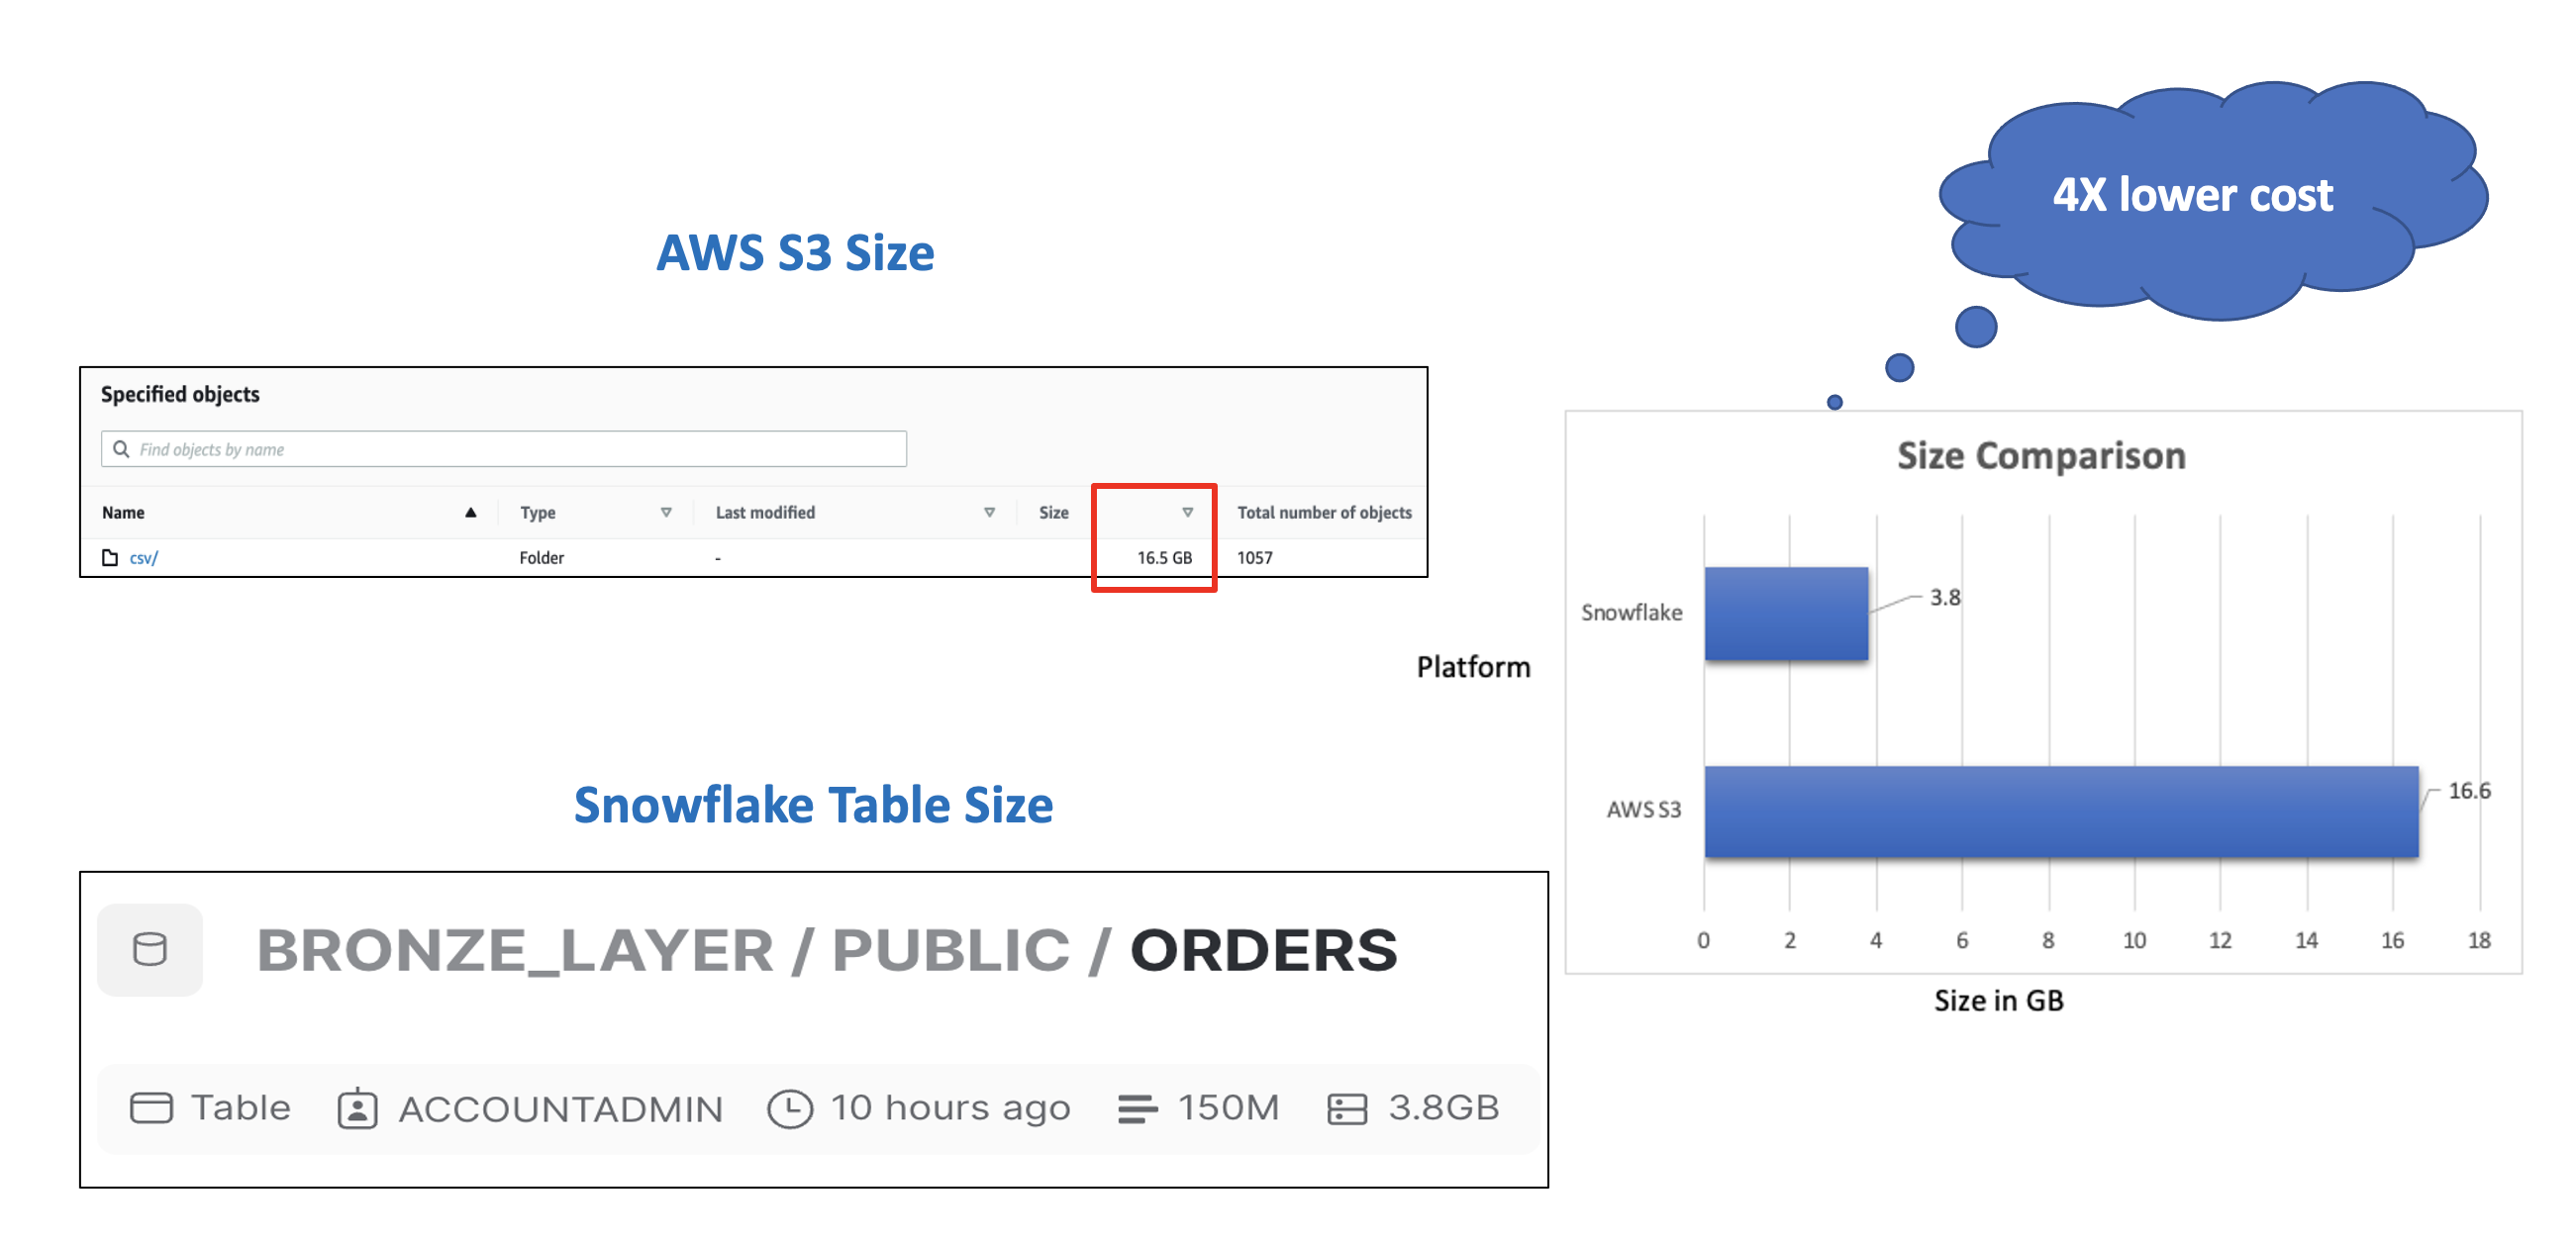

# <font size="5"><ins>Unstructured File Processing</ins></font>

The scenario we will cover for Unstructured Processing is as below.

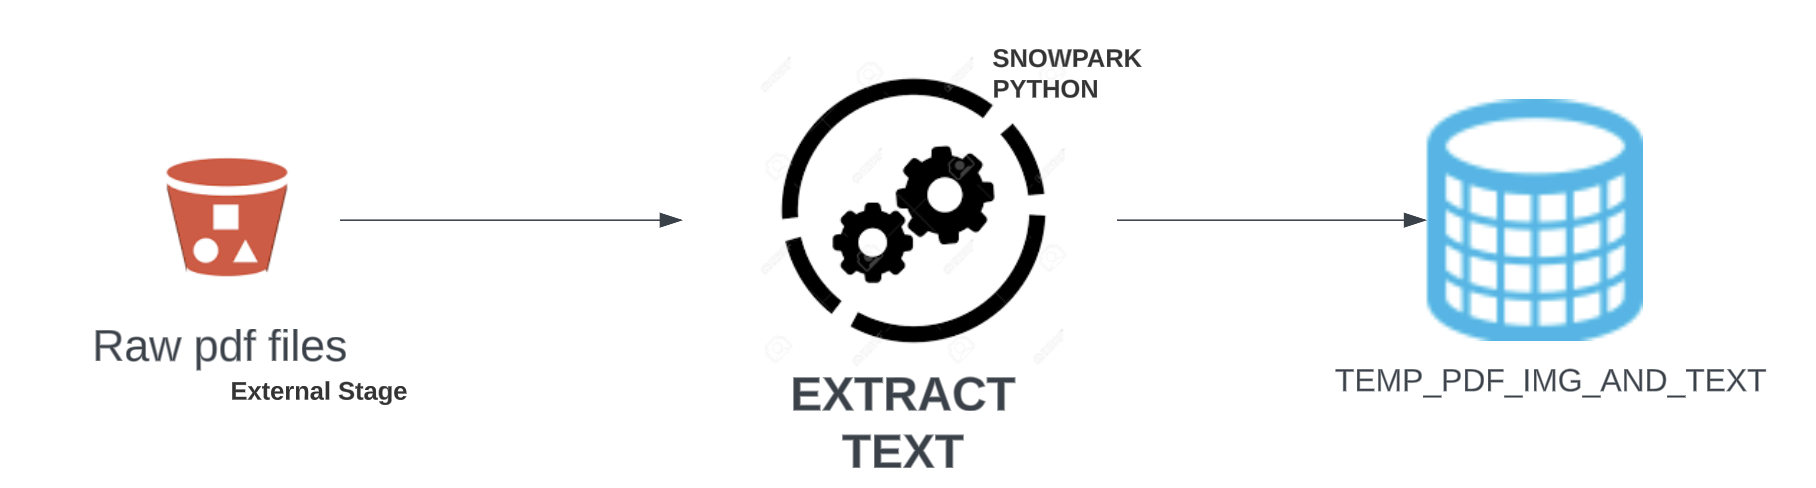

In [27]:
session.sql("CREATE OR REPLACE DATABASE PDF_EXTRACT_EY_DEMO;").collect()

[Row(status='Database PDF_EXTRACT_EY_DEMO successfully created.')]

In [28]:
session.sql("CREATE OR REPLACE STAGE pdf_ext_s3_stage \
        directory = (enable = true)  \
        storage_integration = BRONZE_INTEGRATION \
        url = 's3://naveen-demo-s3-bucket/sales/pdfextract/';").collect()

[Row(status='Stage area PDF_EXT_S3_STAGE successfully created.')]

In [4]:
session.sql("LIST @pdf_ext_s3_stage;").collect()

[Row(name='s3://naveen-demo-s3-bucket/sales/pdfextract/File_20221124-095935.pdf', size=2224068, md5='bbef94bd5999535ddeaf7b319310eee7', last_modified='Mon, 20 Feb 2023 18:45:15 GMT'),
 Row(name='s3://naveen-demo-s3-bucket/sales/pdfextract/Payslip_59985333.pdf', size=14802, md5='00e114fd2faa7b17c2272d04667519fa', last_modified='Mon, 20 Feb 2023 18:45:15 GMT'),
 Row(name='s3://naveen-demo-s3-bucket/sales/pdfextract/Payslip_61617483.pdf', size=15863, md5='c1ae2a343d02ead5c67844697209f79d', last_modified='Mon, 20 Feb 2023 18:45:15 GMT'),
 Row(name='s3://naveen-demo-s3-bucket/sales/pdfextract/invoice.pdf', size=52088, md5='1f190f1c1871fd54876f8474ff6034a2', last_modified='Mon, 20 Feb 2023 18:45:15 GMT')]

In [34]:
from snowflake.snowpark.types import StringType
session.add_packages('snowflake-snowpark-python', 'pypdf2')
pdfext_udf = session.udf.register_from_file(name="pdfextract", is_permanent=True, stage_location="@udf", replace=True,
    file_path="./pdf_extract.py",
    func_name="pdfextract",
    return_type=StringType(),input_types=[StringType()]
) 

The version of package pypdf2 in the local environment is 3.0.1, which does not fit the criteria for the requirement pypdf2. Your UDF might not work when the package version is different between the server and your local environment


In [37]:
session.sql("select pdfextract('@pdf_ext_s3_stage/invoice.pdf'); ").to_pandas()

,PDFEXTRACT('@PDF_EXT_S3_STAGE/INVOICE.PDF')
0,Invoice num.: 564003\nProvider\nABC LTD\nCusto...


In [42]:
session.sql("CREATE OR REPLACE TABLE TEMP_PDF_IMG_AND_TEXT (SCOPED_URL VARCHAR, PDF_TEXT VARCHAR)").collect()

[Row(status='Table TEMP_PDF_IMG_AND_TEXT successfully created.')]

In [43]:
session.sql("INSERT INTO TEMP_PDF_IMG_AND_TEXT SELECT BUILD_SCOPED_FILE_URL(@pdf_ext_s3_stage,'invoice.pdf') as SCOPED_URL, 
            pdfextract('@pdf_ext_s3_stage/invoice.pdf') as pdf_text").collect()
            

[Row(number of rows inserted=1)]

In [45]:
session.sql("SELECT * FROM TEMP_PDF_IMG_AND_TEXT").to_pandas()

,SCOPED_URL,PDF_TEXT
0,https://ana95816.snowflakecomputing.com/api/fi...,Invoice num.: 564003\nProvider\nABC LTD\nCusto...


# <font size="5"><ins>Snowpark - Transformations</ins></font>

### To understand how its done, I have taken a simple example of removing duplicates from a 6M sample table

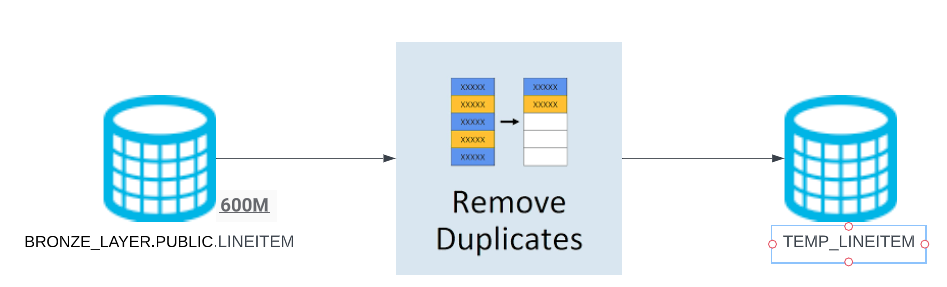


In [11]:
session.sql("ALTER WAREHOUSE DEMO_QAS_WH SET WAREHOUSE_SIZE = 'X-LARGE';").collect() #-- For re-runs
session.sql("CREATE OR REPLACE STAGE UDF;").collect()

[Row(status='Stage area UDF successfully created.')]

In [12]:
%%time
import snowflake.snowpark
from snowflake.snowpark.functions import sproc

@sproc(name="write_distinct_df_to_table", is_permanent=True, stage_location="@udf", replace=True, packages=["snowflake-snowpark-python"])
def write_distinct_df_to_table(session: snowflake.snowpark.Session, x: str) -> str:
    lineitem_df = session.table('LINEITEM')
    lineitem_df = lineitem_df.dropDuplicates()
    lineitem_df.write.mode("overwrite").save_as_table("temp_lineitem")
    return 'Table Created Sucessfully'
    
session.sql("call write_distinct_df_to_table('test')").collect()

CPU times: user 33.5 ms, sys: 6.98 ms, total: 40.5 ms
Wall time: 1min 7s


[Row(WRITE_DISTINCT_DF_TO_TABLE='Table Created Sucessfully')]

### SQL Generated behind the scenes in Snowflake for the UDF created using Snowpark dataframes

1. PROC created as pickle (binary file on disk)
2. When the PROC is called, the dedup is done using a SQL (as simple as that)

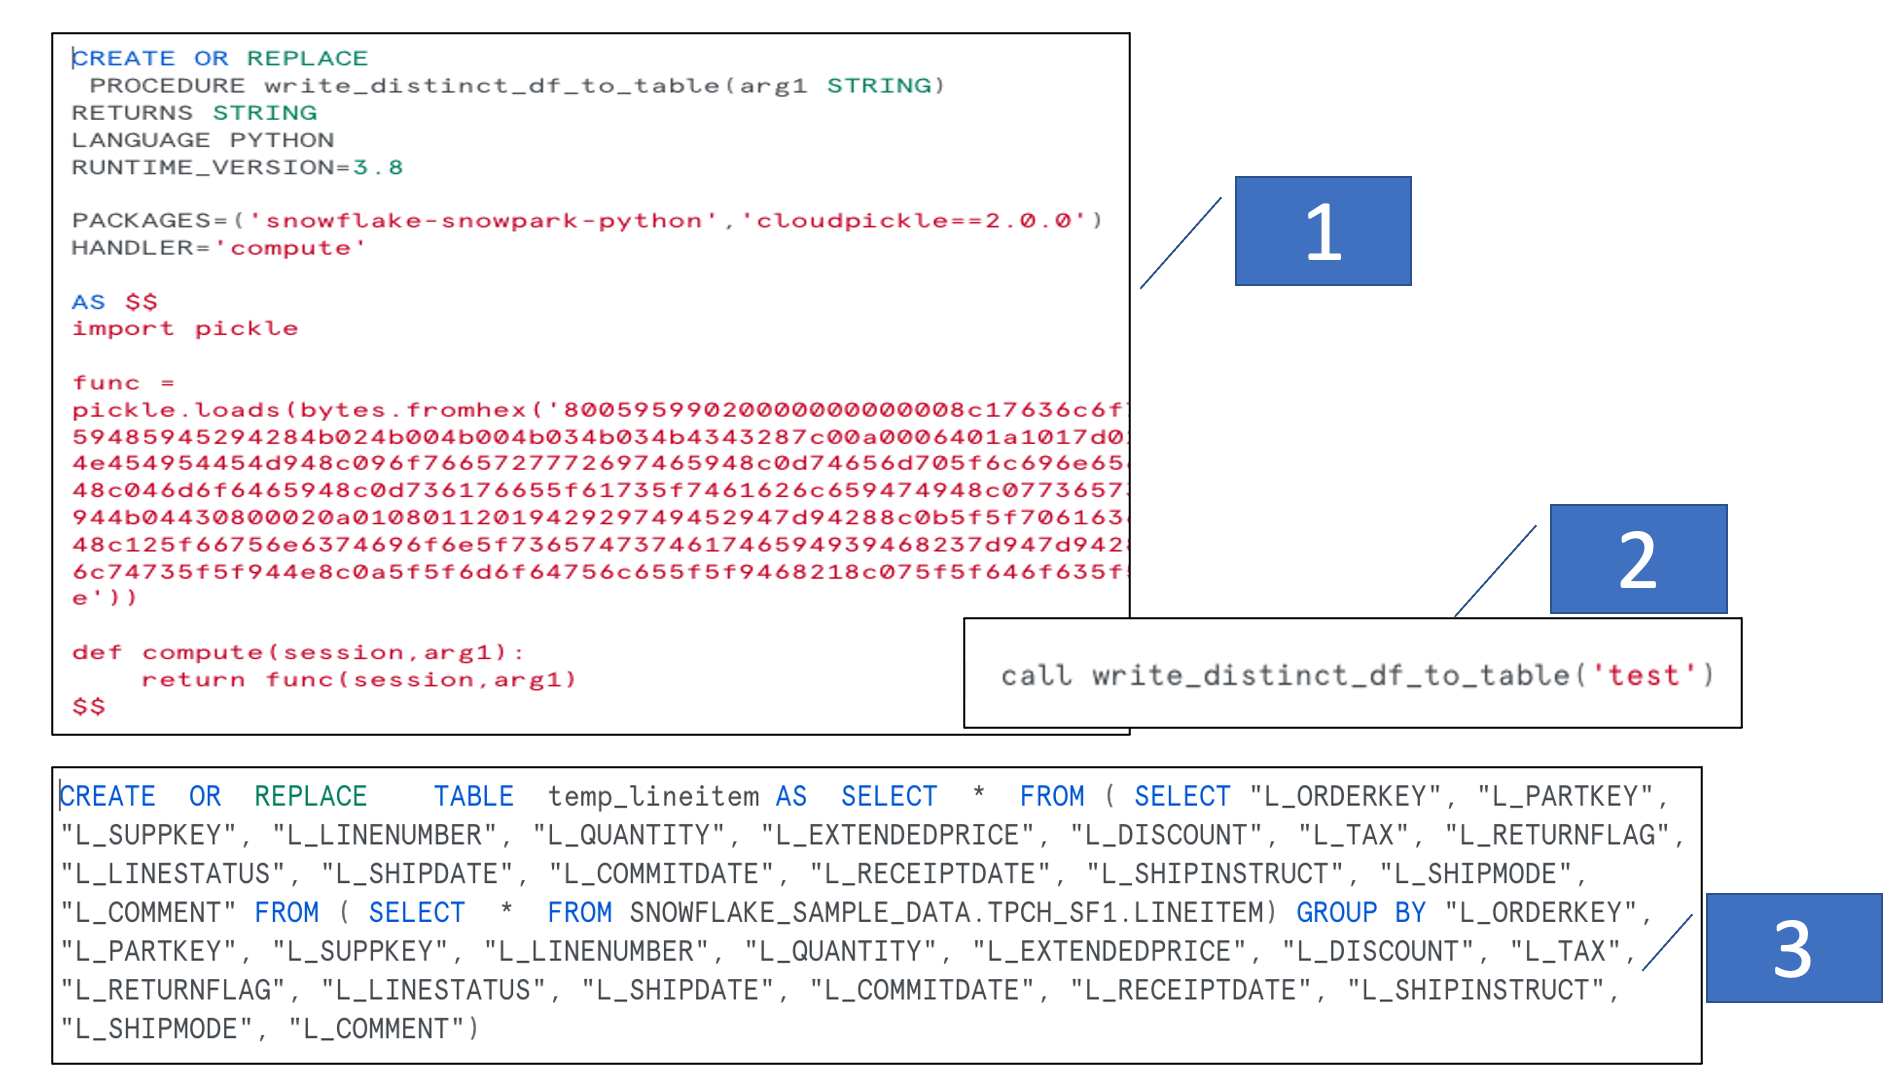

<hr/>
<hr/>
<h1><ins> Further more example of Transformation </ins> </h1>
<hr/>
<hr/>

<font size="4">The below example covers how a common apply transformation of Pandas API can be implemented within Snowpark.</font>

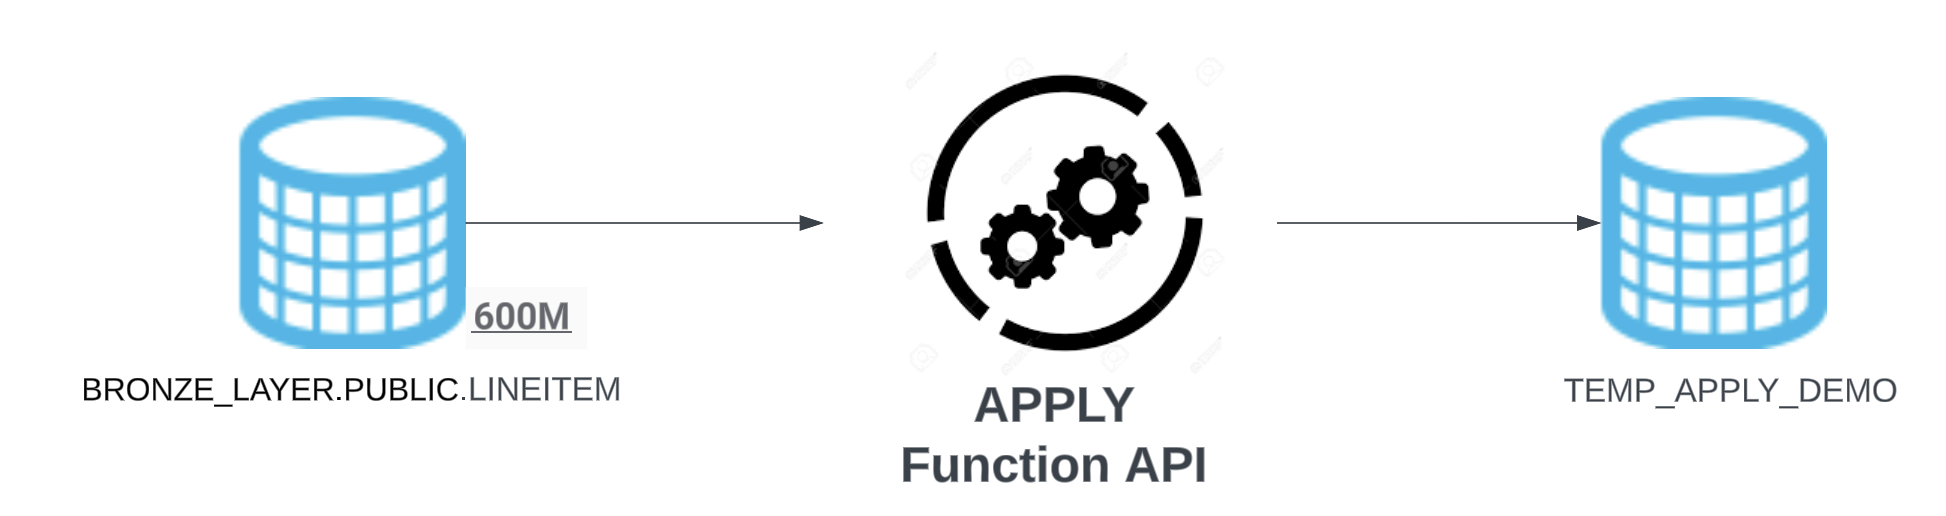

In [38]:
%%time
import snowflake.snowpark
from snowflake.snowpark.functions import sproc
from snowflake.snowpark.functions import udf
from snowflake.snowpark.types import StringType

update_lineitem = udf(lambda x: 'DELIVER IN PERSON' if x=='NONE' else x, return_type=StringType(), input_types=[StringType()], 
                      name="update_lineitem", replace=True)

@sproc(name="apply_demo_df_to_table", is_permanent=True, stage_location="@udf", replace=True, packages=["snowflake-snowpark-python"])
def apply_demo_df_to_table(session: snowflake.snowpark.Session, x: str) -> str:
    lineitem_df = session.table('LINEITEM')
    lineitem_df = lineitem_df.with_column('L_SHIPINSTRUCT_UPDATED', update_lineitem(lineitem_df['L_SHIPINSTRUCT']))
    lineitem_df.write.mode("overwrite").save_as_table("temp_apply_demo_snowpark")
    return 'Table Updated Sucessfully'
    
session.sql("call apply_demo_df_to_table('test')").collect()

CPU times: user 211 ms, sys: 53.8 ms, total: 265 ms
Wall time: 1min 33s


[Row(APPLY_DEMO_DF_TO_TABLE='Table Updated Sucessfully')]

# <font size="6">Summary</font>

<font size="4">As you can see Snowflake can store and process all types of data (Structured, Unstructured and Semi-structured) data at a record time. Snowflake is a pure serverless offering, where you Pay As You Use. It also scales independently and you can have any number of clusters for your account which is ideal for your different domains giving them ultimate freedom to own their data products. With Snowpark providing freedom for DE and DS to use Python code within Snowflake opens up a wider range of use-cases and possibilities. Snowflake Sharing capability which will follow this lab is a unique feature of Snowflake where every Customer in Snowflake can share data with each other with Market golden standard governance and security. This enables Data Mesh, Data Fabric based architecure possible within Snowflake DataCloud. With lot of cool features being developed like Native Applications, Unistore, Streamlit integration and with its wider parter eco-system <ins>SNOWFLAKE BECOMES THE ONE AND ONLY PLATFORM FOR THE ENTERPRISES WITH LONG-TERM VISION </ins></font>

In [6]:
if session: # it is good to ensure there is NO ACTIVE SESSION when using Snowpark in notebook hence closing down any session for code reusablity
    session.close()